# Hypothesis Testing with Insurance Data

Work with the US Health Insurance Dataset (1) from Kaggle (2).

(1)
https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv

(2)
https://www.kaggle.com/teertha/ushealthinsurancedataset

Answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question, make sure to:

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result

# 1. Preliminary Steps

In [109]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [74]:
# load data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv'
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Do smokers have higher insurance charges than non-smokers?

In [75]:
# how many smokers and non-smokers?
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [76]:
# split into groups
smokers_df = df.loc[df['smoker'] == 'yes'].copy()
nonsmokers_df = df.loc[df['smoker'] == 'no'].copy()

In [77]:
# define variable 'charges' for each group
smokers_charges = smokers_df['charges']
nonsmokers_charges = nonsmokers_df['charges']

## 2.1 Hypotheses

Null: Smokers and non-smokers have the same insurance charges.

Alternative: Smokers and non-smokers have significantly different insurance charges.

Alpha: 0.05

## 2.2 Select Test

Data: Numeric

Samples/groups: 2 (smokers and nonsmokers)

Test: 2 Sample T-Test (Independent T-Test)

## 2.3 Test Assumptions

1. No significant outliers
2. Normality
3. Equal variance

In [78]:
# check for and remove outliers

# smokers
smokers_zscores = stats.zscore(smokers_charges)
smokers_outliers = abs(smokers_zscores) > 3
print(f"Outliers for smokers: {np.sum(smokers_outliers)}")

# nonsmokers
nonsmokers_zscores = stats.zscore(nonsmokers_charges)
nonsmokers_outliers = abs(nonsmokers_zscores) > 3
print(f"Outliers for nonsmokers: {np.sum(nonsmokers_outliers)}")

Outliers for smokers: 0
Outliers for nonsmokers: 24


In [81]:
# print outliers for nonsmokers
outliers = nonsmokers_charges[(np.abs(stats.zscore(nonsmokers_charges)) > 3)]
outliers.sort_values()

964     26467.09737
379     27000.98473
1142    27117.99378
138     27322.73386
539     27346.04207
140     27375.90478
516     27724.28875
770     27941.28758
443     28287.89766
987     28340.18885
959     28468.91901
806     28476.73499
9       28923.13692
696     29186.48236
1258    30063.58055
62      30166.61817
115     30259.99556
387     30284.64294
573     31620.00106
936     32108.66282
599     33471.97189
242     35160.13457
1012    36580.28216
1206    36910.60803
Name: charges, dtype: float64

The lowest amount of charges that is an outlier is $26,467.

In [82]:
# remove outliers for nonsmokers
nonsmokers_charges = nonsmokers_charges[(np.abs(stats.zscore(nonsmokers_charges)) <= 3)]

To check if the outliers were removed, we can see if there are any charges at $26,467 or above.

In [83]:
# check if outliers were removed
nonsmokers_charges.max()

26392.26029

All the outliers were removed.

In [84]:
# check for normality

# smokers
result_smokers_charges = stats.normaltest(smokers_charges)
print(result_smokers_charges)

# nonsmokers
result_nonsmokers_charges = stats.normaltest(nonsmokers_charges)
print(result_nonsmokers_charges)

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)
NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)


The p-values for the normality tests for both the smokers and nonsmokers' charges are below our chosen alpha value of 0.05, so we will reject the null hypothesis that these groups are normally distributed. 

This means that we will consider our data to NOT be normally distributed.

The need for normally-distributed data can be skipped if there are more than 15 samples in both groups. We have many more samples than that in our data (see below), so we will move on.

In [24]:
# how many smokers and non-smokers?
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [25]:
# check for equal variance
result = stats.levene(smokers_charges, nonsmokers_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

The p-value for our equal variance test is below our chosen alpha value of 0.05, so we will reject the null hypothesis that these groups have equal variances.

This means that we will consider these two groups to have UNEQUAL (different) variances.

To combat this, we will include the argument "equal_var = False" in our test.

## 2.4 Execute Test

In [26]:
# independent (2-sample) t-test with equal_var = False
result = stats.ttest_ind(smokers_charges, nonsmokers_charges,
                        equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

## 2.5 p-value Interpretation

The p-value for our T-Test is below our chosen alpha value of 0.05, so we will reject the null hypothesis that smokers and nonsmokers have equal insurance charges. 

This means that we will consider smokers and nonsmokers to have UNEQUAL insurance charges.

## 2.6 Supporting Visualization

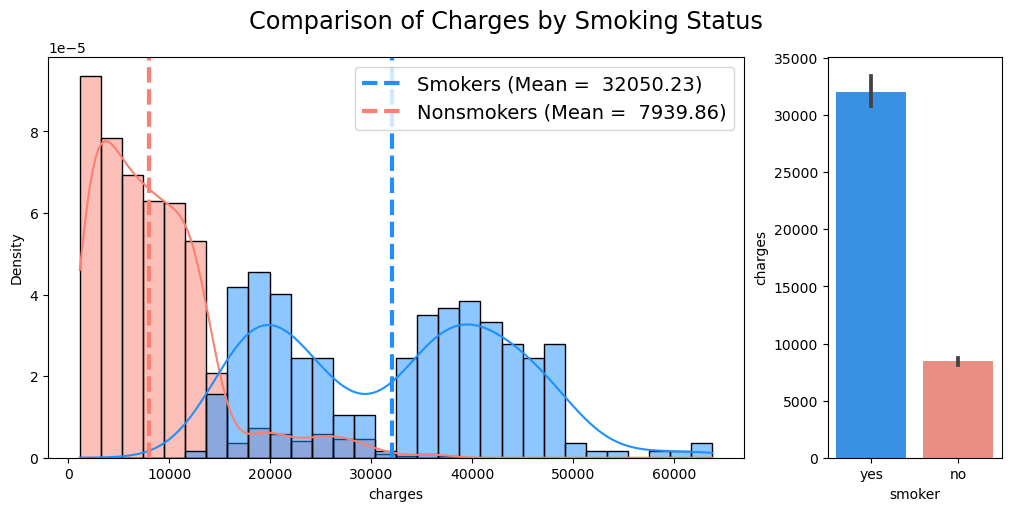

In [85]:
# specify colors
groups_palette={'yes': 'dodgerblue', 
                "no": 'salmon'}

# visualize means
fig, (ax, ax_bar) = plt.subplots(figsize = (10, 5), 
                                 ncols = 2, 
                                 constrained_layout = True,
                                 gridspec_kw = {'width_ratios': [0.8, 0.2]})

# histogram
ax = sns.histplot(data = df, 
                  x = 'charges', 
                  fill = True, 
                  hue = 'smoker', 
                  kde = True, 
                  stat = 'density', 
                  common_norm = False,
                  ax = ax, 
                  palette = groups_palette)

ax.axvline(np.mean(smokers_charges), 
           ls = '--',
           lw = 3, 
           label = f"Smokers (Mean = {np.mean(smokers_charges): .2f})",
           color = groups_palette['yes'])

ax.axvline(np.mean(nonsmokers_charges), 
           ls = '--', 
           lw = 3, 
           label = f"Nonsmokers (Mean = {np.mean(nonsmokers_charges): .2f})",
           color = groups_palette['no'])

ax.legend(prop = {"size": 14}, 
          loc = 'upper right') #bbox_to_anchor=[1,1])

# barplot
sns.barplot(data = df, 
            x = 'smoker', 
            y = 'charges',
            ax = ax_bar,
            palette = groups_palette)

fig.suptitle('Comparison of Charges by Smoking Status',
             fontsize = 'xx-large');

# 3. Are men more likely to smoke than women?

## 3.1 Hypotheses

Null: Men and women are equally likely to smoke.

Alternative: Men and women differ in their likeliness to smoke.

Alpha: 0.05

## 3.2 Select Test

Data: Categorical

Samples/groups: 2 (men and women)

Test: Chi-Square

## 3.3 Test Assumptions

1. Two categorical variables (ordinal or nominal)
2. Outcomes are independent

Our two categorical variables, men and women, are nominal.

Our outcomes are independent (men's likeliness to smoke is not influenced by women's likeliness to smoke and vice versa). 

## 3.4 Execute Test

In [87]:
# get contingency table for chi-squared test input
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [88]:
# run chi-squared test
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

# print p-value
print(p)

0.006548143503580696


## 3.5 p-value Interpretation

Our p-value is less than our designated alpha (0.05), so we will reject the null hypothesis that men and women are equally likely to smoke.

This means that we will consider men and women UNEQUALLY likely to smoke.

## 3.6 Supporting Visualization

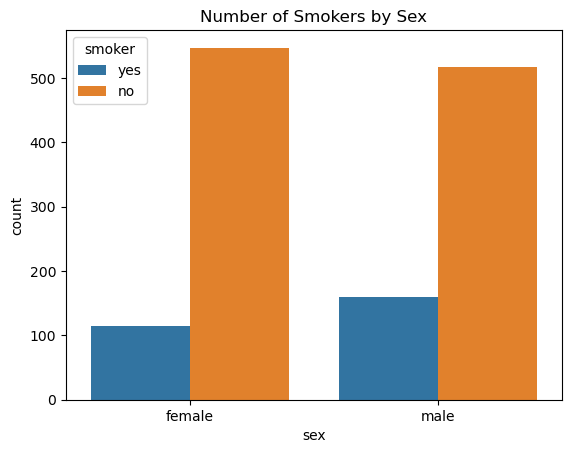

In [91]:
# plot likeliness to smoke by sex
ax = sns.countplot(data = df, x = 'sex', hue = 'smoker')
ax.set_title("Number of Smokers by Sex");

# 4. Do different regions have different charges, on average?

## 4.1 Hypotheses

Null: Different regions have the same charges on average.

Alternative: Different regions have significantly different charges on average.

Alpha: 0.05

## 4.2 Select Test

Data: Numeric (charges in $)

Samples/groups: 4 (regions; see below)

Test: One-way ANOVA and/or Tukey

In [93]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [97]:
# prepare regions into a dictionary
groups = {}

# loop through regions
for region in df['region'].unique():
    
    # grab charges for that region
    data = df.loc[df['region'] == region, 'charges'].copy()
    
    # add to dictionary
    groups[region] = data
    
# check
groups

{'southwest': 0       16884.92400
 12       1826.84300
 15       1837.23700
 18      10602.38500
 19      36837.46700
            ...     
 1316     1731.67700
 1329    10325.20600
 1331    10795.93733
 1332    11411.68500
 1336     2007.94500
 Name: charges, Length: 325, dtype: float64,
 'southeast': 1        1725.5523
 2        4449.4620
 5        3756.6216
 6        8240.5896
 11      27808.7251
            ...    
 1322    12981.3457
 1323    43896.3763
 1327     9377.9047
 1330    12629.1656
 1335     1629.8335
 Name: charges, Length: 364, dtype: float64,
 'northwest': 3       21984.47061
 4        3866.85520
 7        7281.50560
 9       28923.13692
 24       6203.90175
            ...     
 1319     7201.70085
 1320     5425.02335
 1324     4239.89265
 1333    10600.54830
 1337    29141.36030
 Name: charges, Length: 325, dtype: float64,
 'northeast': 8        6406.41070
 10       2721.32080
 16      10797.33620
 17       2395.17155
 20      13228.84695
            ...     
 1321

## 4.3 Test Assumptions

One-way ANOVA (comparison of more than 2 groups on one variable)
1. Normality
2. Equal variance
3. No significant outliers

In [99]:
# check each group for normality

# create dictionary to save results
norm_results = {}

# iterate through groups dictionary
for region, data in groups.items():
    
    # get the test stat and p-value from doing a normality test
    stat, p = stats.normaltest(data)
    
    # save to dictionary; include the size of the group
    norm_results[region] = {'n': len(data),
                           'p': p,
                           'test stat': stat}
    
# convert to df
norm_results_df = pd.DataFrame(norm_results).T

# add column to show if p-value < 0.05
norm_results_df['sig'] = norm_results_df['p'] < 0.05

# show
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


All regions' p-values are below our chosen alpha of 0.05, so we can reject the null hypothesis of the normality test that the sample comes from a normal distribution. Therefore, we consider the charges to be NOT normally distributed.

Although the charges for the regions are NOT normally distributed, we have more than 20-30 observations in each region. This is large enough to continue with the ANOVA.

In [101]:
# check for equal variance
result = stats.levene(*groups.values())
result

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

The p-value for our equal variance test is below our chosen alpha value of 0.05, so we will reject the null hypothesis that these groups have equal variances.

This means that we will consider these two groups to have UNEQUAL (different) variances.

Although our categories have unequal variances, we will still go ahead with the ANOVA test since it is known to be robust against unequal variances when the sample sizes are approximately equal, which they are (see value_counts above).

In [105]:
# check for and remove outliers

# iterate through groups
for region, charges in groups.items():
    zscores = stats.zscore(charges)
    outliers = abs(zscores) > 3
    print(f"Outliers for {region}: {np.sum(outliers)}")
    print(charges[(np.abs(stats.zscore(charges)) > 3)].sort_values())
    print()

Outliers for southwest: 8
94      47291.05500
251     47305.30500
1284    47403.88000
328     47928.03000
39      48173.36100
175     48824.45000
34      51194.55914
1146    52590.82939
Name: charges, dtype: float64

Outliers for southeast: 2
1300    62592.87309
543     63770.42801
Name: charges, dtype: float64

Outliers for northwest: 7
569     45702.02235
677     46130.52650
1122    46661.44240
1301    46718.16325
55      47496.49445
819     55135.40209
1230    60021.39897
Name: charges, dtype: float64

Outliers for northeast: 4
288    47896.79135
330    48517.56315
281    48549.17835
577    58571.07448
Name: charges, dtype: float64



In [106]:
# delete outliers
for region, charges in groups.items():
    groups[region] = charges[(np.abs(stats.zscore(charges)) <= 3)]

To check if the outliers were removed, we can see if there are any charges at the lowest amount of outlier charges or above for each region.

In [107]:
# check if outliers were removed
for region, charges in groups.items():
    print(f"{region} max charges: {charges.max()}")

southwest max charges: 46113.511
southeast max charges: 49577.6624
northwest max charges: 43943.8761
northeast max charges: 46255.1125


All the outliers were removed.

## 4.4 Execute Test (ANOVA)

In [108]:
# one-way ANOVA with equal_var = False
result = stats.f_oneway(*groups.values())
result

F_onewayResult(statistic=5.496394682506454, pvalue=0.0009419710075537749)

## 4.5 p-value Interpretation (ANOVA)

The p-value from the one-way ANOVA is below our chosen alpha of 0.05, meaning that we can reject the null hypothesis that the regions' charges have no statistically significant difference.

However, we don't know which regions have different charges from each other, since the ANOVA only tells us that there is a significant difference between some regions. 

To compare each region against each other region, we will use Tukey's pairwise multiple comparisons test.

## 4.6 Execute Test (Tukey's)

In [114]:
# make dataframe of regions and charges
tukeys_df = pd.DataFrame(columns = ['region', 'charges'])

# convert dictionary groups into df (outliers were deleted
# from dictionary)
for region, series in groups.items():
    values = pd.Series(series.tolist())
    tukeys_df = pd.concat([tukeys_df, pd.DataFrame(
        {'region': [region] * len(values), 
         'charges': values})], ignore_index = False)
    
# check
tukeys_df

,region,charges
0,southwest,16884.92400
1,southwest,1826.84300
2,southwest,1837.23700
3,southwest,10602.38500
4,southwest,36837.46700
...,...,...
315,northeast,28101.33305
316,northeast,13143.33665
317,northeast,7050.02130
318,northeast,22395.74424


In [115]:
# save values and labels
values = tukeys_df['charges']
labels = tukeys_df['region']

# tukey's multiple comparison test
tukeys_results = pairwise_tukeyhsd(values, labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-1340.917,0.4263,-3611.7411,929.9072,False
northeast,southeast,1529.834,0.2794,-670.6825,3730.3505,False
northeast,southwest,-1511.915,0.3181,-3784.5349,760.705,False
northwest,southeast,2870.7509,0.0046,666.5645,5074.9374,True
northwest,southwest,-170.998,0.9974,-2447.1716,2105.1756,False
southeast,southwest,-3041.7489,0.0023,-5247.7854,-835.7125,True


## 4.7 p-value Interpretation (Tukey's)

There are two p-values in the Tukey's results that fall below our designated alpha of 0.05 and that therefore allow us to reject the null hypothesis that they are not different.

The first is the comparison between the Northwest and Southeast regions; the second is between the Southeast and Southwest. We will consider the charges between these two pairs to be statistically significantly different.

## 4.6 Supporting Visualization

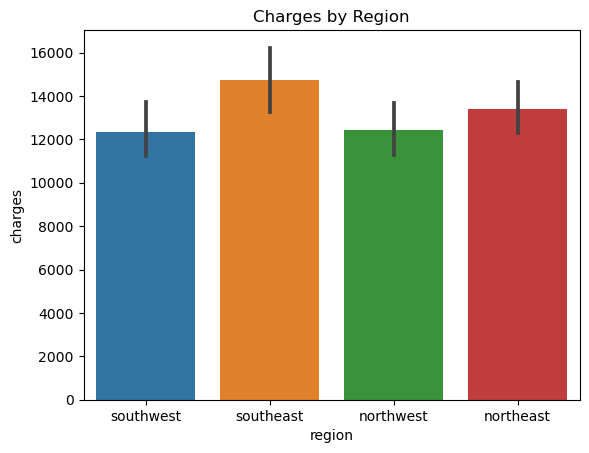

In [96]:
# barplot to compare means (charges) of regions
ax = sns.barplot(data = df, x = 'region', y = 'charges')
ax.set_title('Charges by Region');

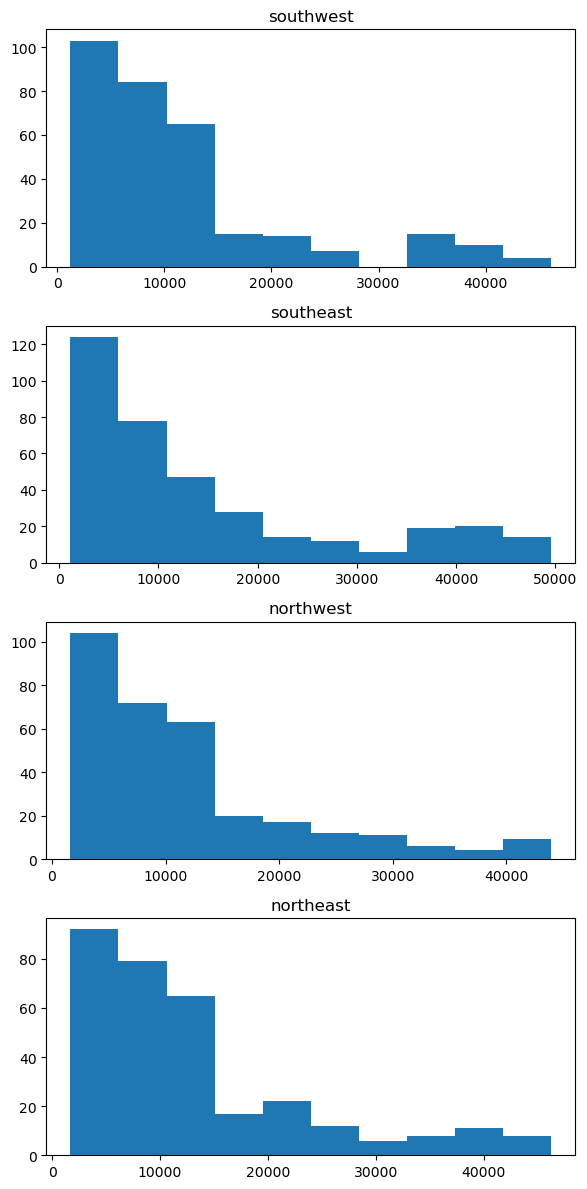

In [126]:
# show distributions of charges for each region

# create figure with subplots
fig, axes = plt.subplots(nrows = 4,
                        ncols = 1,
                        figsize = (6, 12))

num = 0

# iterate over categories and plot histograms
for region, charges in groups.items():
    
    # select subplot
    ax = axes[num]
    
    # plot histogram
    ax.hist(charges)
    
    # set title
    ax.set_title(f"{region}")
    
    # increment n
    num += 1
    
# adjust spacing and show
fig.tight_layout()
plt.show();